___________
___________
## <center>Los Datos</center>
#
Los datos que se proporciona consisten en dos conjuntos de archivos que, en conjunto, describen el comportamiento de los clientes dentro de un programa de lealtad de una aerolínea.
#
***Customer Flight Analysis.csv***

Este archivo contiene información sobre la **actividad de vuelo de los clientes**, incluyendo el <u>número de vuelos reservados</u>, la <u>distancia volada</u>, <u>puntos acumulados y redimidos</u>, y <u>costos asociados a los puntos redimidos</u>.

Diccionario:

* `Loyalty Number`: Este atributo representa un identificador único para cada cliente dentro del programa de lealtad de la aerolínea. Cada número de lealtad
corresponde a un cliente específico.
*  `Year`: Indica el año en el cual se registraron las actividades de vuelo para el cliente.
* `Month`: Representa el mes del año (de 1 a 12) en el cual ocurrieron las actividades de vuelo.
* `Flights Booked`: Número total de vuelos reservados por el cliente <span style="color:#f3c925">en ese **mes** específico.</span>
*  `Flights with Companions`: Número de vuelos reservados en los cuales el cliente viajó con acompañantes.
* `Total Flights`: El número total de vuelos que el cliente ha realizado, que <u style="color:#f3c925">**puede incluir vuelos reservados en meses anteriores**</u>.
* `Distance`: La distancia total (presumiblemente en millas o kilómetros) que el cliente ha volado <span style="color:#f3c925">**durante el mes**</span>.
* `Points Accumulated`: Puntos acumulados por el cliente en el programa de lealtad <span style="color:#f3c925">**durante el mes**</span>, con base en la distancia volada u otros factores.
* `Points Redeemed`: Puntos que el cliente ha redimido <span style="color:#f3c925">**en el mes**</span>, posiblemente para obtener beneficios como vuelos gratis, mejoras, etc.
* `Dollar Cost Points Redeemed`: El valor en dólares de los puntos que el cliente ha redimido durante <span style="color:#f3c925">**el mes**</span>.
#
#

***Customer Loyalty History.csv***

Este archivo proporciona un **perfil detallado de los clientes**, incluyendo su <u>ubicación</u>, <u>nivel educativo</u>, ingresos</u>, <u>estado civil</u>, y <u>detalles sobre su membresía en el programa de lealtad</u> (como el <u>tipo de tarjeta</u>, <u>valor de vida del cliente</u>, y <u>fechas de inscripción y cancelación</u>).

* `Loyalty Number`: Identificador único del cliente dentro del programa de lealtad. Este número permite correlacionar la información de este archivo con el archivo
de actividad de vuelos.
* `Country`: País de residencia del cliente.
* `Province`: Provincia o estado de residencia del cliente (aplicable a países con divisiones provinciales estatales, como Canadá).
* `City`: Ciudad de residencia del cliente.
* `Postal Code`: Código postal del cliente.
* `Gender`: Género del cliente (ej. Male para masculino y Female para femenino).
* `Education`: Nivel educativo alcanzado por el cliente (ej. Bachelor para licenciatura, College para estudios universitarios o técnicos, etc.).
* `Salary`: Ingreso anual <span style="color:#f3c925">**estimado**</span> del cliente.
* `Marital Status`: Estado civil del cliente (ej. Single para soltero, Married para casado, Divorced para divorciado, etc.).
* `Loyalty Card`: Tipo de tarjeta de lealtad que posee el cliente. Esto podría indicar distintos niveles o categorías dentro del programa de lealtad.
* `CLV (Customer LifeTime Value)`: **Valor total estimado que el cliente aporta a la empresa durante toda** la relación que mantiene con ella.
* `Enrollment Type`: Tipo de inscripción del cliente en el programa de lealtad (ej. Standard).
* `Enrollment Year`: Año en que el cliente se inscribió en el programa de lealtad.
* `Enrollment Month`: Mes en que el cliente se inscribió en el programa de lealtad.
* `Cancellation Year`: Año en que el cliente canceló su membresía en el programa de lealtad, si aplica.
* `Cancellation Month`: Mes en que el cliente canceló su membresía en el programa de lealtad, si aplica.
#
#
___________
___________

## <center>Ejercicio</center>
_____

### <span style="color:#f3c925">**Fase 1: Exploración y Limpieza**</span>

1. Exploración Inicial:
    * Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.
    * Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
    * Une los dos conjuntos de datos de la forma más eficiente.

2. Limpieza de Datos: 
    * Elimina o trata los valores nulos, si los hay, en las columnas clave para  asegurar que los datos estén completos. 
    * Verifica la consistencia y corrección de los datos para asegurarte de que  los datos se presenten de forma coherente. 
    * Realiza  cualquier  ajuste  o  conversión  necesaria  en  las  columnas  (por  ejemplo, cambiar Epos de datos) para garantizar la adecuación de los  datos para el análisis estadístico.

* Importar librerías y setear visualización

In [1]:
# Importar librerías y extender visualización
import pandas as pd
import numpy as np
import re 

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
import seaborn as sns

import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest, ttest_ind, norm, chi2_contingency, f_oneway, chi2_contingency, mannwhitneyu, kruskal, kendalltau

from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer


# -----------------------------------------------------------------------
# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")


# -----------------------------------------------------------------------
# Comprobando que el display sea el máximo para mostrar mejor el data frame
pd.set_option("display.max_rows", 100)  # Cambia el número máximo de filas mostradas
pd.set_option("display.max_columns", None)  # Cambia el número máximo de columnas mostradas
pd.set_option("display.width", 1000)  # Cambia el ancho máximo de la pantalla

* Leer el documento *Customer Flight Activity*

In [2]:
df_flight_activity = pd.read_csv(r"C:\Users\yaelp\Desktop\Adalab\Evaluaciones\evaluacion_modulo_03\final_03\Customer Flight Activity.csv")
df_flight_activity

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


* Revisión de nombres de *Customer Flight Activity*

In [3]:
# Revisando los nombres para unificarlos --------------------------------------------------------------------------------------------------------------------------------------------------------

# Se pasan a minúsculas y se sustituye el espacio por guion bajo. -------------------------------------------------------------------------------------------------------------------------------
df_flight_activity.columns = df_flight_activity.columns.str.lower().str.replace(" ", "_")
df_flight_activity.columns

# Primero veamos si hay nulos -------------------------------------------------------------------------------------------------------------------------------------------------------------------
df_flight_activity.isnull().sum()

# Ahora vemos los tipos de datos ----------------------------------------------------------------------------------------------------------------------------------------------------------------
df_flight_activity.dtypes  # Conclusión1: si bien es extraño que point accumulated esté en float y redeemed en int, esto puede depender de la política de la empresa por lo que no se cambiará
                           # Conclusión2: dollar cost points debe de ser float ya que son dolares.
# Cambio de tipo de dato de dollar_cost_points_redeemed
df_flight_activity["dollar_cost_points_redeemed"] = df_flight_activity["dollar_cost_points_redeemed"].astype(float)

df_flight_activity.dtypes # Verificamos que los cambios se han hecho correctamente --------------------------------------------------------------------------------------------------------------

# Ahora veremos los valores unicos de las columnas para ver si tienen sentido -------------------------------------------------------------------------------------------------------------------
df_flight_activity["year"].unique()  # Sólo tenemos los datos de 2017 y 2018, por lo que está bien
df_flight_activity["month"].unique() # Sólo tenemos 12 meses por lo que es correcto
df_flight_activity["loyalty_number"].duplicated().sum() # Hay 388887 duplicados, este número debe de ser único por lo que probablemente tengamos líneas duplicadas o la numeración es incorrecta.

388887

* EDA *Customer Flight Activity* y cambios menores

In [4]:
# Verificamos los duplicados ya que es extrañamente alto ----------------------------------------------------------------------------------------------------------------------------------------
df_flight_activity.shape
print(f"El porcentaje de duplicados es: {(df_flight_activity["loyalty_number"].duplicated().sum() / len(df_flight_activity) * 100):.2f}%")
# Sacamos los números duplicados ----------------------------------------------------------------------------------------------------------------------------------------------------------------
duplicados = df_flight_activity[df_flight_activity["loyalty_number"].duplicated(keep=False)]
duplicados
num_duplicados = df_flight_activity["loyalty_number"][df_flight_activity["loyalty_number"].duplicated()].unique().tolist()
num_duplicados
# Ahora vemos cuantas veces se están repitiendo cada uno de los números repetidos ---------------------------------------------------------------------------------------------------------------
repeticiones = df_flight_activity["loyalty_number"][df_flight_activity["loyalty_number"].duplicated(keep=False)].value_counts()
pd.set_option("display.max_rows", 100) # EStoy jugando entre None y 100
repeticiones
# Veamos cuantos números de deuplicados se están repitiendo según la cantidad de veces que se repiten -------------------------------------------------------------------------------------------
conteo_repeticiones = repeticiones.value_counts()
conteo_repeticiones # Vemos que los 1 valor se repite 72 veces, 16574 valores se repiten 24 veces y 162 valores se repiten 48 veces

# Creamos una columna de concatenado de todos los valores para ver si hay duplicados al 100% dentro de los valores duplicados y así poder eliminar las filas -------------------------------------
df_flight_activity["concatenado"] = df_flight_activity.astype(str).agg(" ".join, axis=1)
df_flight_activity.head()

# Vamos a sacar los duplicados de la columna concatenada para ver cuantos hay, así como su porcentaje --------------------------------------------------------------------------------------------
concat_duplicados = df_flight_activity[df_flight_activity["concatenado"].duplicated(keep=False)]
concat_duplicados.nunique() # Hay  1848 duplicados de la columna de concatenado

# Ahora vamos a hacer una fusión, de los concatenados duplicados si está el número de duplicados, cuantos hay y cuales son -----------------------------------------------------------------------
verif = df_flight_activity["concatenado"].isin(concat_duplicados["concatenado"]) & df_flight_activity["loyalty_number"].isin(num_duplicados)
pd.set_option("display.max_rows", 100) # Estoy jugando entre None y 100
verif.sum() # Vemos que hay 3712 valores duplicados

# Salto de caja porque ya es demasiado pesado ----------------------------------------------------------------------------------------------------------------------------------------------------

El porcentaje de duplicados es: 95.87%


3712

* Eliminación de duplicados de *Customer Flight Activity*

In [5]:
# Tendremos que visualizar el df de estos duplicados para asegurarnos de nuevo de que es así, para esto vamos a ordenarlo por num_duplicados -----------------------------------------------------
df_duplicados = df_flight_activity[(df_flight_activity["concatenado"].isin(concat_duplicados["concatenado"])) & (df_flight_activity["loyalty_number"].isin(num_duplicados))]
pd.set_option("display.max_rows", 100) # Estoy jugando entre None y 100
df_duplicados

# Veamos si realmente este es 100% duplicado -----------------------------------------------------------------------------------------------------------------------------------------------------
print(f"Porcentaje de duplicados 100%: {round((verif.sum() / len(df_flight_activity)) * 100, 2)}%") # Da un 0.92% que es extremandamente bajo, hay que verificarlo

# Lo verificamos visualmente ya que los resultados son extraños ----------------------------------------------------------------------------------------------------------------------------------
df_duplicados = df_duplicados.sort_values(by="loyalty_number")
pd.set_option("display.max_rows", 100) # Estoy jugando entre None y 100
df_duplicados # Se ve que han sucedido en meses distintos por lo que se eliminan sólo las filas 100% duplicadas

# Eliminando sólo el 100% de duplicados ----------------------------------------------------------------------------------------------------------------------------------------------------------
verif100 =    df_flight_activity  [df_flight_activity["concatenado"].duplicated(keep=False)     &    df_flight_activity["loyalty_number"].duplicated(keep=False)]
verifi100_2=  verif100.groupby("concatenado").filter(lambda x: len(x) > 1) # Agrupamos concatenado y sólo si hay más de un grupo de concatenado para que sean duplicados
verifi100_2

# Se elimina basándose sólo en concatenado pero se mantiene siempre la primera repetición para que sólo quede un valor único y ya no esté repetido -----------------------------------------------
df_flight_activity = df_flight_activity.drop_duplicates(subset="concatenado", keep="first") 
# Verificamos que todo haya salido correctamente -------------------------------------------------------------------------------------------------------------------------------------------------
verificar_concat_duplicados = (df_flight_activity["concatenado"].duplicated().sum() / len(df_flight_activity)) * 100
print(f"Porcentaje de duplicados de la columna concatenada: {verificar_concat_duplicados:.2f}%")

Porcentaje de duplicados 100%: 0.92%
Porcentaje de duplicados de la columna concatenada: 0.00%


In [6]:
# Verificar de nuevo todos los duplicados ---------------------------------------------------------------------------------------------------------------------------------------------------------
df_flight_activity["loyalty_number"].duplicated(keep=False).sum() # Se entiende que puede haber duplicados puesto que es el mismo cliente en distintos meses tal vez
df_flight_activity.sort_values(by="loyalty_number") 
# Se elimina la columna concat ahora que ya no sirve ------------------------------------------------------------------------------------------------------------------------------------------
df_flight_activity = df_flight_activity.drop(columns="concatenado")
df_flight_activity.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0.0
1,100102,2017,1,10,4,14,2030,203.0,0,0.0
2,100140,2017,1,6,0,6,1200,120.0,0,0.0
3,100214,2017,1,0,0,0,0,0.0,0,0.0
4,100272,2017,1,0,0,0,0,0.0,0,0.0


* Verificando nulos o ceros de *Customer Flight Activity*

In [7]:
# Ahora vemos si hay 0 que tomaremos con nulo ya que no siginifica mucho ------------------------------------------------------------------------------------------------------------------------
for columna in df_flight_activity.columns:
    cantidad_ceros = (df_flight_activity[columna] == 0).sum()
    print(f"Columna: {columna.upper()}  Qty de ceros: {cantidad_ceros}") # Hay varias columnas con demasiados ceros, ahora sacamor el porcentaje para ver que tan representativo es ------------

print("_____"*40)
# Porecentaje de ceros para ver que tan representativo es ---------------------------------------------------------------------------------------------------------------------------------------
for columna in df_flight_activity.columns:
    cantidad_ceros = (df_flight_activity[columna] == 0).sum() 
    total_filas = len(df_flight_activity[columna]) 
    porcentaje_ceros = (cantidad_ceros / total_filas) * 100 # Sacar el porcentaje
    print(f"Columna: {columna.upper()} Qty de ceros: {cantidad_ceros} Porcentaje de ceros: {round(porcentaje_ceros, 2)}%") # Hay porcentajes muy altos

Columna: LOYALTY_NUMBER  Qty de ceros: 0
Columna: YEAR  Qty de ceros: 0
Columna: MONTH  Qty de ceros: 0
Columna: FLIGHTS_BOOKED  Qty de ceros: 196128
Columna: FLIGHTS_WITH_COMPANIONS  Qty de ceros: 295023
Columna: TOTAL_FLIGHTS  Qty de ceros: 196128
Columna: DISTANCE  Qty de ceros: 196128
Columna: POINTS_ACCUMULATED  Qty de ceros: 196128
Columna: POINTS_REDEEMED  Qty de ceros: 379579
Columna: DOLLAR_COST_POINTS_REDEEMED  Qty de ceros: 379579
________________________________________________________________________________________________________________________________________________________________________________________________________
Columna: LOYALTY_NUMBER Qty de ceros: 0 Porcentaje de ceros: 0.0%
Columna: YEAR Qty de ceros: 0 Porcentaje de ceros: 0.0%
Columna: MONTH Qty de ceros: 0 Porcentaje de ceros: 0.0%
Columna: FLIGHTS_BOOKED Qty de ceros: 196128 Porcentaje de ceros: 48.58%
Columna: FLIGHTS_WITH_COMPANIONS Qty de ceros: 295023 Porcentaje de ceros: 73.07%
Columna: TOTAL_FLIG

In [8]:
# Veamos donde no hay ceros o nulos en la columna de vuelos --------------------------------------------------------------------------------------------------------------------------------------
df_flight_activity[df_flight_activity["flights_booked"].notna() & (df_flight_activity["flights_booked"] != 0)].sample(10)
# Se ve que puntos acumulados equivalen a los 3 primeros digitos de la distancia. Verificamos ----------------------------------------------------------------------------------------------------
df_flight_activity["distance"].max()
# Veamos si el patrón visto corresponde, es decir, siempre los primeros 3 dígitos de distance corresponden a los points_accumulated --------------------------------------------------------------
df_verificar_puntos = df_flight_activity[["loyalty_number", "distance", "points_accumulated"]]
df_verificar_puntos.sort_values(by="loyalty_number").where((df_verificar_puntos["distance"] != 0) & df_verificar_puntos["distance"].notna()).dropna().sample(10) # Hay algunos incorrectos -------


,loyalty_number,distance,points_accumulated
65358,878633.0,2736.0,273.0
57119,442609.0,3003.0,300.0
132532,855400.0,2650.0,265.0
394648,418281.0,2008.0,200.0
385127,947620.0,891.0,89.0
274582,324048.0,3856.0,385.0
207832,369141.0,2938.0,293.0
174656,402966.0,1067.0,106.0
205953,268293.0,1440.0,144.0
137826,241167.0,3773.0,377.0


In [9]:
# Corregir datos de puntos acumulados -------------------------------------------------------------------------------------------------------------------------------------------------------------
# Rellenamos diciendo que los primeros 3 dígitos de distance sean los puntos acumulados y convertimos a int por coherencia ------------------------------------------------------------------------
def rellenar_points_accumulated(df):
    for index, fila in df.iterrows():
        df.at[index, "points_accumulated"] = str(fila["distance"])[:3]

    df["points_accumulated"] = pd.to_numeric(df["points_accumulated"], errors="coerce").fillna(0).astype(int)
    df["distance"] = pd.to_numeric(df["distance"], errors="coerce").fillna(0).astype(int)
    
    return df

df_flight_activity = rellenar_points_accumulated(df_flight_activity)
print(f"dtype:\n'distance': {df_flight_activity["distance"].dtype} 'points_accumulated': {df_flight_activity["points_accumulated"].dtype}") # Correctamente cambiado a int --------------------------
df_flight_activity.sort_values(by="loyalty_number", ascending=False).sample(10)

dtype:
'distance': int32 'points_accumulated': int32


,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
273631,272812,2018,5,0,0,0,0,0,0,0.0
209454,454985,2018,1,3,3,6,2094,209,0,0.0
280944,660922,2018,5,4,0,4,360,360,0,0.0
5454,392558,2017,1,0,0,0,0,0,0,0.0
366734,214661,2017,2,1,1,2,504,504,484,39.0
11434,781495,2017,11,6,1,7,3010,301,334,27.0
212286,604783,2018,1,0,0,0,0,0,0,0.0
56519,251641,2018,1,2,1,3,2448,244,372,30.0
8574,557633,2017,1,0,0,0,0,0,0,0.0
105211,303934,2017,7,0,0,0,0,0,0,0.0


* Leer documento *Customer Loyalty History*

In [10]:
df_loyalty_history = pd.read_csv(r"C:\Users\yaelp\Desktop\Adalab\Evaluaciones\evaluacion_modulo_03\final_03\Customer Loyalty History.csv")
df_loyalty_history.shape

(16737, 16)

* Verificando la longitud de los valores únicos que pueden unir los 2 DF

In [11]:
df_flight_activity["loyalty_number"].nunique() # Tiene 16737 valores únicos -----------------------------------------------------------------------------------------------------------------------
df_loyalty_history["Loyalty Number"].nunique() # Tiene 16737 valroes únicos -----------------------------------------------------------------------------------------------------------------------
df_loyalty_history["Loyalty Number"].duplicated(keep=False).sum()
# Se observan que hay la misma cantidad de loyalty_number por lo que se hará una fusión con merge ya que se comparte el loyalty_number ------------------------------------------------------------


0

* Cambios de nombre de columna de DataFrame *Customer Loyalty History*

In [12]:
# Antes se cambiarán los nombres de las columnas del df 2
df_loyalty_history.columns = df_loyalty_history.columns.str.lower().str.replace(" ", "_")
df_loyalty_history.columns

Index(['loyalty_number', 'country', 'province', 'city', 'postal_code', 'gender', 'education', 'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month', 'cancellation_year', 'cancellation_month'], dtype='object')

* Verificando los tipos de datos de las columnas del DataFrame *Customer Loyalty History*

In [13]:
df_loyalty_history.dtypes # Hay que hacer sólo dos cambios: cancellation_year y  cancellation_month   de  float  a   int --------------------------------------------------------------------------     
df_loyalty_history["cancellation_year"].value_counts(dropna=True) # Se determina que se puede pasar a INT sin problemas 
df_loyalty_history["cancellation_year"].isnull().sum() # Tiene 14670 nulos
df_loyalty_history["cancellation_year"] = df_loyalty_history["cancellation_year"].fillna(0).astype(int)
df_loyalty_history["cancellation_year"].dtype

dtype('int32')

In [14]:
df_loyalty_history["cancellation_month"].value_counts(dropna=True) # Se determina que se puede pasar a INT sin problemas
df_loyalty_history["cancellation_month"].isnull().sum() # Tiene 14670 nulos
df_loyalty_history["cancellation_month"] = df_loyalty_history["cancellation_month"].fillna(0).astype(int)
df_loyalty_history["cancellation_month"].dtype

dtype('int32')

* Unir los DataFrame

In [15]:
df_flight_activity["loyalty_number"].nunique() # Tiene 16737 valores únicos -----------------------------------------------------------------------------------------------------------------------
df_loyalty_history["loyalty_number"].nunique() # Tiene 16737 valroes únicos -----------------------------------------------------------------------------------------------------------------------
df_loyalty_history["loyalty_number"].duplicated(keep=False).sum()
# Se observan que hay la misma cantidad de loyalty_number por lo que se hará una fusión con merge ya que se comparte el loyalty_number ------------------------------------------------------------


0

In [16]:
# Usamos el método merge para unir y unimos con inner ya que estamos usando la columna en común y traeremos sólo las filas con coincidencias ------------------------------------------------------
df_unido = pd.merge(df_flight_activity, df_loyalty_history, on="loyalty_number", how="inner")

In [17]:
df_unido.sample(10)  

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
299616,763618,2017,11,0,0,0,0,0,0,0.0,Canada,Ontario,Toronto,M1R 4K3,Female,College,NaN,Single,Star,6781.27,Standard,2016,8,2017,4
138282,304131,2017,9,10,0,10,810,810,0,0.0,Canada,Ontario,Kingston,M9K 2P4,Male,Bachelor,75886.0,Married,Nova,5260.92,Standard,2013,4,0,0
248300,787249,2018,3,0,0,0,0,0,0,0.0,Canada,British Columbia,Vancouver,V1E 4R6,Male,Bachelor,104613.0,Married,Aurora,7591.83,Standard,2016,2,2016,10
68042,144977,2017,5,0,0,0,0,0,0,0.0,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,72656.0,Divorced,Nova,10963.96,Standard,2012,10,0,0
312695,632556,2018,7,0,0,0,0,0,0,0.0,Canada,Alberta,Banff,T4V 1D4,Male,Bachelor,48405.0,Divorced,Aurora,8672.19,Standard,2015,9,0,0
361185,526020,2018,10,5,4,9,1737,173,0,0.0,Canada,Ontario,Kingston,M9K 2P4,Male,College,NaN,Divorced,Star,25030.89,2018 Promotion,2018,4,0,0
228019,289133,2018,3,7,7,14,1358,135,0,0.0,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,89017.0,Divorced,Nova,14230.32,Standard,2013,9,0,0
382678,771667,2018,11,0,0,0,0,0,0,0.0,Canada,Quebec,Montreal,H2T 2J6,Male,Bachelor,48899.0,Married,Nova,7078.95,Standard,2014,4,0,0
1276,169247,2017,1,0,0,0,0,0,0,0.0,Canada,Nova Scotia,Halifax,B3C 2M8,Female,Bachelor,54908.0,Married,Nova,32021.40,Standard,2018,12,0,0
323909,694828,2018,12,11,3,14,1694,169,537,43.0,Canada,Ontario,London,M5B 3E4,Male,High School or Below,44092.0,Single,Nova,5169.50,Standard,2012,10,0,0


* Verificando nulos, ceros, valores peculiares del df unido 

Columna: LOYALTY_NUMBER OK
Columna: YEAR OK
Columna: MONTH OK
Columna: FLIGHTS_BOOKED        Qty de ceros: 196128
                                                              Porcentaje de ceros: 48.58%
Columna: FLIGHTS_WITH_COMPANIONS        Qty de ceros: 295023
                                                              Porcentaje de ceros: 73.07%
Columna: TOTAL_FLIGHTS        Qty de ceros: 196128
                                                              Porcentaje de ceros: 48.58%
Columna: DISTANCE        Qty de ceros: 196128
                                                              Porcentaje de ceros: 48.58%
Columna: POINTS_ACCUMULATED        Qty de ceros: 196128
                                                              Porcentaje de ceros: 48.58%
Columna: POINTS_REDEEMED        Qty de ceros: 379579
                                                              Porcentaje de ceros: 94.01%
Columna: DOLLAR_COST_POINTS_REDEEMED        Qty de ceros: 379579
              

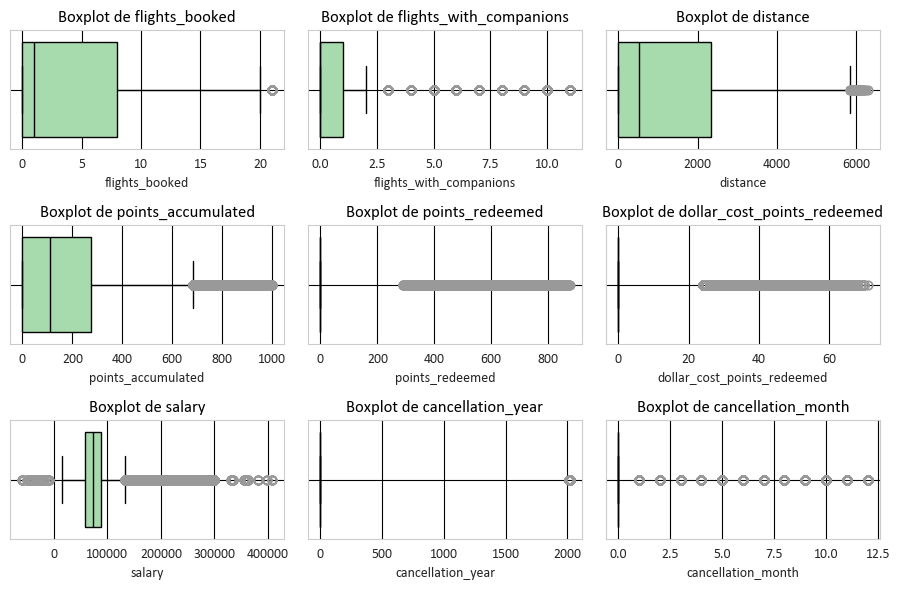

In [18]:
# Reutilizamos código anterior cambiendo los nombres de las variables. Buscamos la cantidad de nulos, ceros y que tan representativos son ---------------------------------------------------------
for columna in df_unido.columns:
    qty_zero = (df_unido[columna] == 0).sum() 
    qty_null = df_unido[columna].isna().sum()
    total_rows = len(df_unido[columna]) 
    percent_zero = (qty_zero / total_rows) * 100 # Sacar el porcentaje de ceros
    percent_null = (qty_null / total_rows) * 100  # Sacar el porcentaje de nulos
    #print(f"Columna: {columna.upper()}\nQty de ceros: {qty_zero} Porcentaje de ceros: {round(percent_zero, 2)}%\nQty de nulos: {qty_null} Porcentaje de nulos: {round(percent_null,2)}%") 

    # El otro código era demasiado largo, con este imprimimos sólo si en caso de haber nulos o ceros 
    if qty_zero > 0:
        print(f"Columna: {columna.upper()}        Qty de ceros: {qty_zero}\n                                                              Porcentaje de ceros: {round(percent_zero, 2)}%")
    if qty_null > 0:
        print(f"Columna: {columna.upper()}        Qty de nulos: {qty_null}\n                                                              Porcentaje de nulos: {round(percent_null, 2)}%")
    if qty_zero == 0 and qty_null == 0: # Para saber si la columna está ok, sacamos este print 
        print(f"Columna: {columna.upper()} OK")

# Vemos que los porcentajes de nulos o ceros es bastante elevado ---------------------------------------------------------------------------------------------------------------------------------

# FLIGHTS_BOOKED                    Qty de ceros: 196128            Porcentaje de ceros: 48.58%
# FLIGHTS_WITH_COMPANIONS           Qty de ceros: 295023            Porcentaje de ceros: 73.07%
# DISTANCE                          Qty de ceros: 196128            Porcentaje de ceros: 48.58%
# POINTS_ACCUMULATED                Qty de ceros: 196128            Porcentaje de ceros: 48.58%
# POINTS_REDEEMED                   Qty de ceros: 379579            Porcentaje de ceros: 94.01%
# DOLLAR_COST_POINTS_REDEEMED       Qty de ceros: 379579            Porcentaje de ceros: 94.01%
# SALARY                            Qty de nulos: 102260            Porcentaje de nulos: 25.33%
# CANCELLATION_YEAR                 Qty de ceros: 354110            Porcentaje de ceros: 87.7%
# CANCELLATION_MONTH                Qty de ceros: 354110            Porcentaje de ceros: 87.7%

# Antes de nada, veamos los outliers de las columnas que nos interesan ---------------------------------------------------------------------------------------------------------------------------
columnas_revisar = ["flights_booked", "flights_with_companions", "distance",  "points_accumulated",  "points_redeemed", "dollar_cost_points_redeemed", "salary", 
                    "cancellation_year", "cancellation_month"]

# Configuración de estilo
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Calibri"
plt.figure(figsize=(9, 6))

# Ajustar los colores y estilos
for i, columna in enumerate(columnas_revisar, start=1):
    plt.subplot(3, 3, i)
    # Crear el boxplot con fondo blanco y bordes personalizados
    sns.boxplot(data=df_unido, x=columna, color='white', 
                boxprops=dict(facecolor='#A7DBAD', edgecolor='black'), 
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'),
                medianprops=dict(color='black'))

    plt.title(f"Boxplot de {columna}", color='black')
    plt.grid(color='black')  # Color de la rejilla
    plt.gca().set_facecolor('white')  # Fondo blanco para el subplot

plt.tight_layout()
plt.show()

# Claramente hay outliers presentes en todos los valores de las 9 columnas verificadas ---------------------------------------------------------------------------------------------------------

# FLIGHTS_BOOKED                  
# FLIGHTS_WITH_COMPANIONS          
# DISTANCE                        
# POINTS_ACCUMULATED             
# POINTS_REDEEMED                 
# DOLLAR_COST_POINTS_REDEEMED      
# SALARY      - Con "education" no es posible. - Con "enrollment_type" no es posible.
# CANCELLATION_YEAR                
# CANCELLATION_MONTH               



In [19]:
# Paso 1: Agrupamos por loyalty_number donde no hay nulos ni ceros en CLV y salary y calculamos la media de CLV --------------------------------------------------------------------------------
grupo1 = df_unido[(df_unido["clv"].notna()) & (df_unido["clv"] != 0) & 
                   (df_unido["salary"].notna()) & (df_unido["salary"] != 0)].groupby("enrollment_type")["clv"].mean().reset_index()
grupo1.rename(columns={"clv": "media_clv_1"}, inplace=True)

# Paso 2: Agrupamos por loyalty_number donde CLV no es nulo y no es cero, pero salary sí es nulo o cero ----------------------------------------------------------------------------------------
grupo2 = df_unido[(df_unido["clv"].notna()) & (df_unido["clv"] != 0) & 
                   (df_unido["salary"].isna() | (df_unido["salary"] == 0))].groupby("enrollment_type")["clv"].mean().reset_index()
grupo2.rename(columns={"clv": "media_clv_2"}, inplace=True)

# Paso 3: Comparamos las medias de CLV de los dos grupos ---------------------------------------------------------------------------------------------------------------------------------------
# Primero, unimos los dos grupos por "loyalty_number"
merged = pd.merge(grupo2, grupo1, on="enrollment_type", how="left")


merged.sample(min(len(merged), 10))

,enrollment_type,media_clv_2,media_clv_1
0,2018 Promotion,7619.291535,8192.105501
1,Standard,7582.574252,8124.709497


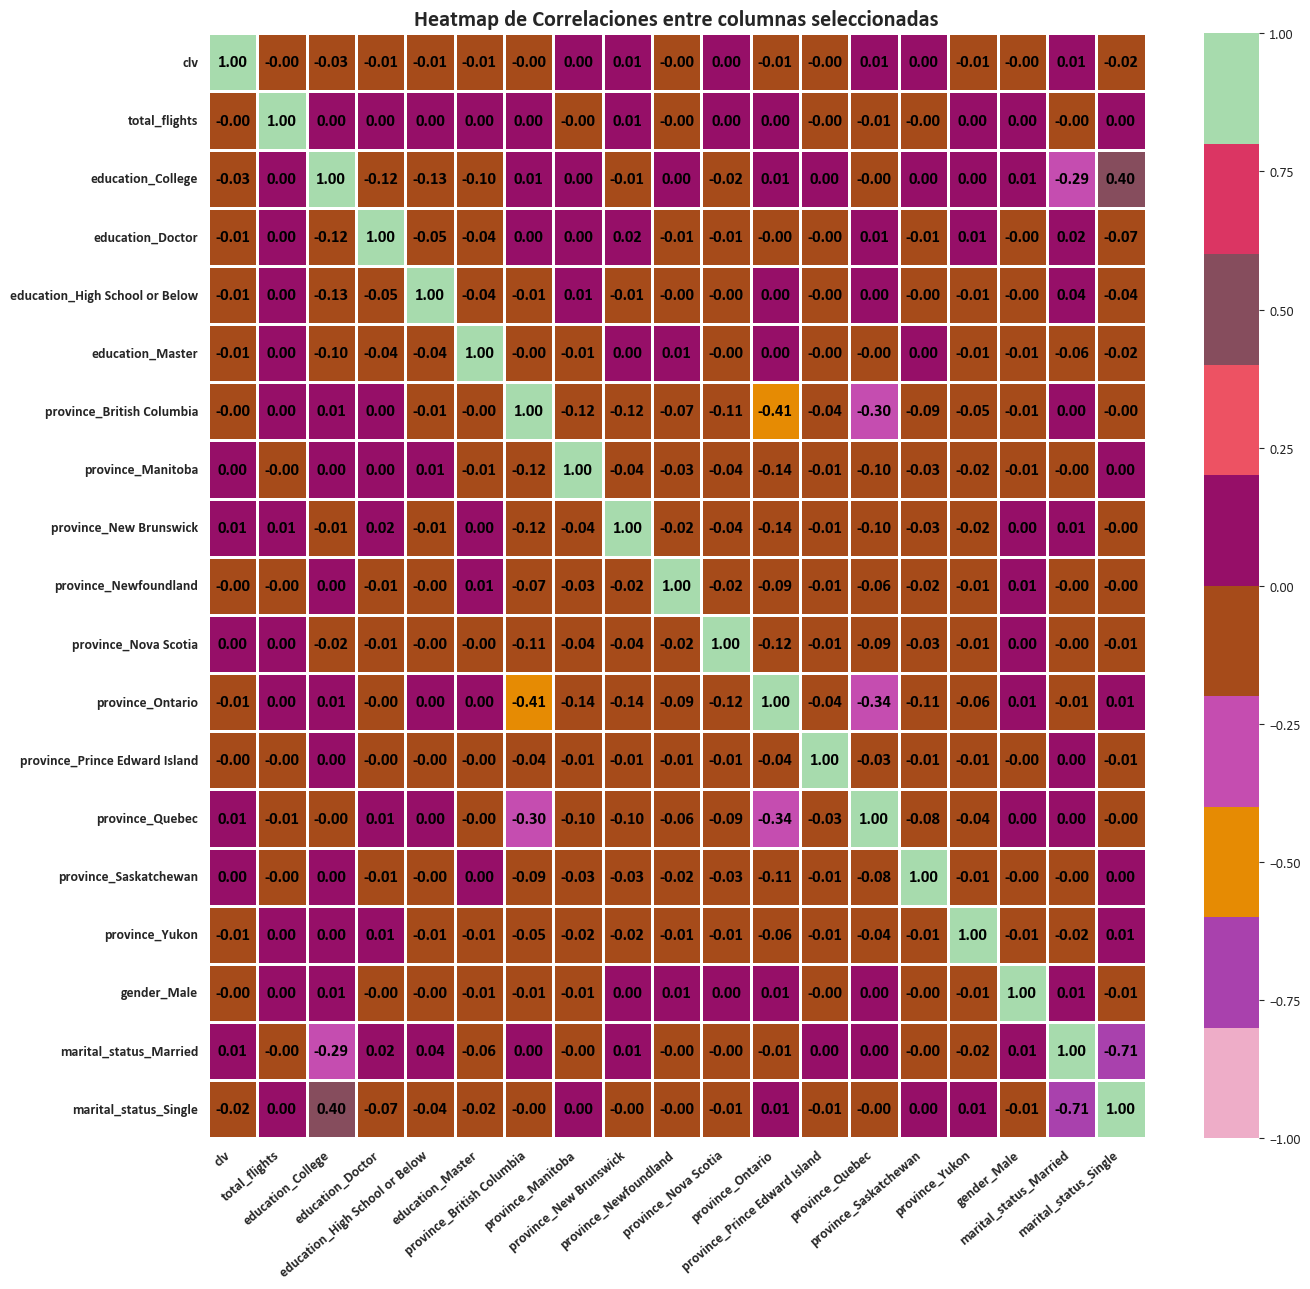

In [20]:
# Las columnas con las que se cree que pueden estar relacionadas y que no tienen nulos o ceros ------------------------------------------------------------------------------------------------
columnas_probables = ["education", "clv", "total_flights", "province", "gender", "marital_status"]

# Convertir categórico en numérico
df_conversion = pd.get_dummies(df_unido[columnas_probables], drop_first=True)

correlacion = df_conversion.corr()


colores = ["#EEADC8", "#A941AD", "#E68B03", "#C54DB0", "#A64B1A", "#960F68", "#ED5263", "#864D5D", "#DB3563", "#A7DBAD"]

plt.figure(figsize=(14, 13))
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap=sns.color_palette(colores, as_cmap=True), 
            annot_kws={"size": 12, "weight": "bold", "color": "black"}, 
            linewidths=0.8, vmin=-1, vmax=1)

plt.title("Heatmap de Correlaciones entre columnas seleccionadas", fontsize=16, fontweight="bold")
plt.xticks(rotation=40, ha="right", fontsize=10, fontweight="bold")
plt.yticks(rotation=0, fontsize=10,fontweight="bold")
plt.tight_layout()



plt.show() # Ninguna relación fuerte visible -------------------------------------------------------------------------------------------------------------------------------------------------
# Se concluye que no se deben de inferir los ceros por lo que no habrá cambios en las columnas


* Guardar el CSV limpio

In [21]:
df_unido.to_csv("df_unido_clean.csv")

### <span style="color:#f3c925">**Fase 2: Visualización**</span>

Usando  las  herramientas  de  visualización  que  has  aprendido  durante  este  módulo, contesta  a  las  siguientes  preguntas  usando  el  Epo  de  gráfica  que  consideres  más adecuado (podéis ponerle fantasía a las gráficas) : 
 
1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año? 
2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes? 
3. ¿Cuál es la distribución de los clientes por provincia o estado? 
4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes? 
5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad? 
6. ¿Cómo se distribuyen los clientes según su estado civil y género?

* Leer el CSV limpio

In [22]:
df_limpio = pd.read_csv("df_unido_clean.csv", index_col=0)
df_limpio.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152,0,0.0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,0,0
1,100102,2017,1,10,4,14,2030,203,0,0.0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,0,0
2,100140,2017,1,6,0,6,1200,120,0,0.0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,0,0
3,100214,2017,1,0,0,0,0,0,0,0.0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,0,0
4,100272,2017,1,0,0,0,0,0,0,0.0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,0,0


In [23]:
df_limpio.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked', 'flights_with_companions', 'total_flights', 'distance', 'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed', 'country', 'province', 'city', 'postal_code', 'gender', 'education', 'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month', 'cancellation_year', 'cancellation_month'], dtype='object')

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año? 

* Se decanta por el método gráfico lineplot ya que es una buena opción porque permite ver de forma clara cómo varían las reservas de vuelos mes a mes, mostrando tendencias fácilmente.
* Lectura: 
    * Se observa en el gráfico que las personas viajan levemente en marzo y comienzan la temporada de viajes en mayo alcanzando su pico en julio que desciende en octubre pero que vuelve a subir en diciembre. 
    Clasificando por picos sería:

        * muy bajo (100000): enero y febrero
        * bajo (118000-120000): abril y noviembre
        * medio (135000-140000): marzo, mayo, septiembre, octubre
        * alto (161000-178000): junio, agosto y diciembre
        * muy alto (198000): julio
    Con esto podemos decir que el pico se encuentra en julio y el punto más bajo en enero. También se observa que las festividades y el clima juegan un factor importante en la toma de decisión de los clientes al volar.
* Aportación:
    * Como sugerencia la empresa podría realizar campañas de marketing teniendo en cuenta las festividades fomentando los viajes ya de por si altos y haciendo campañas y bajando los precios para las temporadas bajas teniendo en cuenta los destinos con un clima cálido que es el contraste observado en el gráfico.

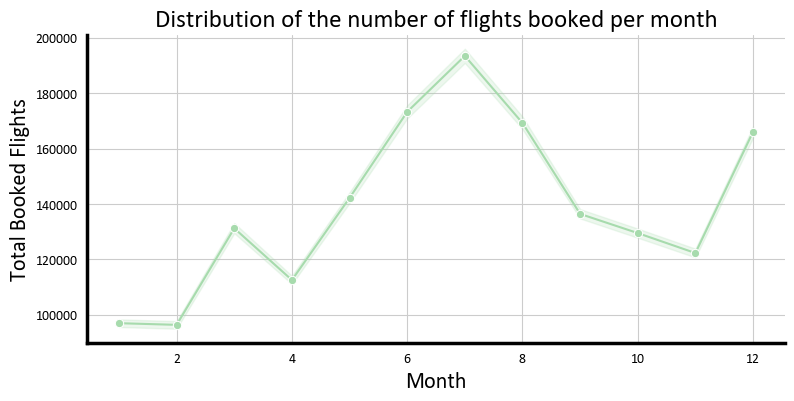

In [24]:
plt.rcParams["font.family"] = "Calibri"  # Cambiar la fuente a Calibri

plt.figure(figsize=(9, 4))
ax = sns.lineplot(x="month", y="flights_booked", data=df_limpio, estimator="sum", marker="o", color="#A7DBAD")

# Título y etiquetas de los ejes
ax.set_title("Distribution of the number of flights booked per month", fontsize=18, color="black")  # Cambiar el color y tamaño del título
ax.set_xlabel("Month", fontsize=16, color="black")  # Cambiar el color y tamaño de la etiqueta del eje X a blanco
ax.set_ylabel("Total Booked Flights", fontsize=16, color="black")  # Cambiar el color y tamaño de la etiqueta del eje Y a blanco


ax.tick_params(axis="x", colors="black")  # Cambiar el color de los números del eje X
ax.tick_params(axis="y", colors="black")  # Cambiar el color de los números del eje Y


# Personalizar los ejes ----------------------------------------------------------------------------------------------------------------------------------------------------------------------
ax.spines["top"].set_visible(False)     # Ocultar línea superior
ax.spines["right"].set_visible(False)   # Ocultar línea derecha
ax.spines["left"].set_linewidth(2.5)    # Hacer la línea del eje Y más gruesa
ax.spines["bottom"].set_linewidth(2.5)  # Hacer la línea del eje X más gruesa
ax.spines["left"].set_color("black")   # Cambiar el color de la línea del eje Y a amarillo
ax.spines["bottom"].set_color("black") # Cambiar el color de la línea del eje X a amarillo



fig = plt.gcf()  # Obtener la figura actual
fig.patch.set_facecolor("white")  # Cambiar el color de fondo de la figura a negro
ax.set_facecolor("white")         # Cambiar el color de fondo del área del gráfico a negro

plt.grid(True)
plt.show()


2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes? 
* Se decanta por el método de gráfico scatterplot ya que contamos con dos variables numéricas y queremos conocer la relación entre ambas por lo que el método nos puede ayudar a visualizarlo.
* Lectura: 
    * Se observa en el DataFrame que hay una relación directa y lineal puesto que los puntos equivalen a los tres primeros dígitos de la distancia recorrida. 
    * En el gráfico observamos la relación lineal de cada una de las variables.

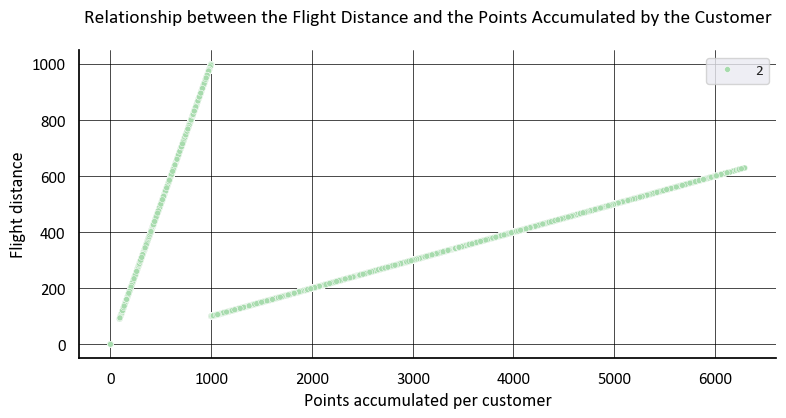

In [45]:
# Configurar la fuente para la gráfica
plt.rcParams["font.family"] = "Calibri"  # Cambiar la fuente a Calibri

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(9, 4))
fig.patch.set_facecolor("white")  # Cambiar el color de fondo de la figura a negro
ax.set_facecolor("white")          # Cambiar el color de fondo del área del gráfico a negro

# Crear el scatterplot
sns.scatterplot(
    x="distance", 
    y="points_accumulated", 
    size=2, 
    color="#A7DBAD",
    data=df_limpio,
    ax=ax
)

# Configurar la cuadrícula
ax.grid(color="black", linestyle="-", linewidth=0.5)  # Cuadrícula blanca

# Personalizar etiquetas y título
ax.set_xlabel("Points accumulated per customer", fontsize=13, color="black")
ax.set_ylabel("Flight distance", fontsize=13, color="black")

# Cambiar las propiedades de las líneas de los ejes
ax.spines["left"].set_color("black")   # Eje Y en amarillo
ax.spines["bottom"].set_color("black")  # Eje X en amarillo
ax.spines["top"].set_visible(False)      # Ocultar línea superior
ax.spines["right"].set_visible(False)    # Ocultar línea derecha

# Cambiar el color de los ticks
ax.tick_params(axis="x", colors="black", labelsize=12)  # Ejes X en blanco
ax.tick_params(axis="y", colors="black", labelsize=12)  # Ejes Y en blanco

# Título de la gráfica (opcional)
plt.title("Relationship between the Flight Distance and the Points Accumulated by the Customer", fontsize=14, color="black", pad=20)

# Mostrar la gráfica
plt.show()


3. ¿Cuál es la distribución de los clientes por provincia o estado? 

* Se decanta por el método gráfico de barras de la librería matplotlib, ya que estamos trabajando con una única variable categórica. El método agrupa los resultados por barras facilitando su lectura.
* Lectura: 
    * Se observa que de la base de datos entregadas y examinando los registros, está más implantada en las provincias de Ontario, la Columbia Británica y Quebec, esto puede tener sentido ya que son las provincias con los PIB más altos de Canadá. El PIB más alto de Canadá lo tiene la Columbia Británica, seguido de Ontario con el 5to puesto y Quebec con el 6to. También Ontario es la provincia con mayor población del país y cuenta con un centro industrial y comercial importante. 
* Aportación:
    * Se le sugiere a la empresa un estudio de mercado comparando con otras compañías aéreas del mismo nivel y adaptar una estrategia de marketing adecuada para llegar a implantarse de manera más robusta en las provincias o ciudades en donde lo vea necesario.


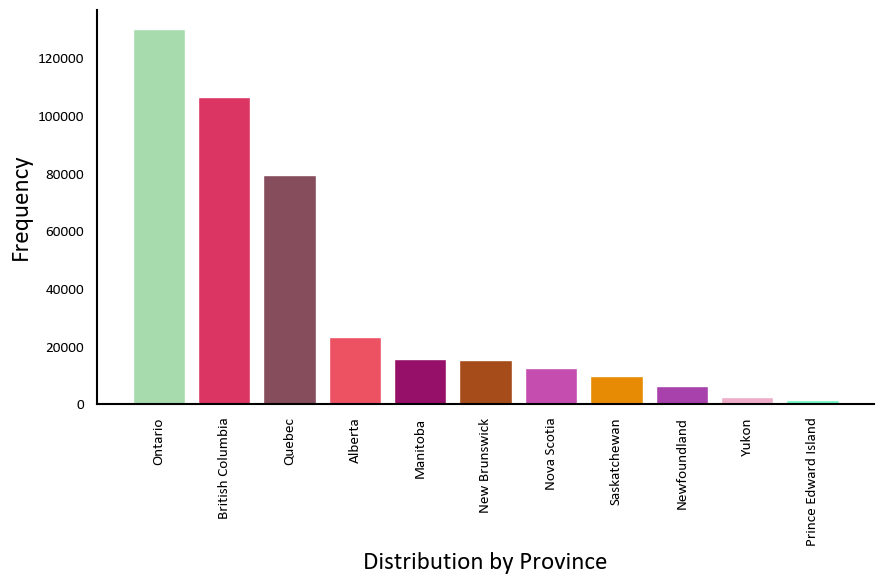

In [65]:
plt.rcParams["font.family"] = "Calibri"  # Cambiar la fuente a Calibri
colores = ["#A7DBAD", "#DB3563", "#864D5D", "#ED5263", "#960F68", "#A64B1A", "#C54DB0", "#E68B03","#A941AD", "#EEADC8", "#6FF7BF",]

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(9, 6))
fig.patch.set_facecolor("white")  
ax.set_facecolor("white")         

counts = df_limpio['province'].value_counts()

for i, (province, count) in enumerate(counts.items()):
    ax.bar(province, count, color=colores[i % len(colores)], edgecolor="white")

# Ajustes de etiquetas con color y tamaño de fuente personalizados
ax.set_xlabel("Distribution by Province", fontsize=18, color="black")  
ax.set_ylabel("Frequency", fontsize=18, color="black")         

# Personalizar los ejes
ax.spines["top"].set_visible(False)     
ax.spines["right"].set_visible(False)   
ax.spines["left"].set_linewidth(1.5)    
ax.spines["bottom"].set_linewidth(1.5)  
ax.spines["left"].set_color("black")   
ax.spines["bottom"].set_color("black") 

ax.tick_params(axis="x", colors="black")  
ax.tick_params(axis="y", colors="black")  
ax.tick_params(axis="x", rotation=90)


plt.tight_layout()
plt.show()

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes? 
* Se decanta por el método gráfico BarPlot ya que muestra las comparaciones entre categorías. También es un método que nos permite combinar variables categóricas y numéricas.
* Lectura: 
    * Se observa que a mayor grado educativo mayor es el salario. 
    * Se puede intuir que los clientes con únicamente bachillerato serán los salarios más bajos del gráfico, si bien es verdad que no se cuenta con la información del salario de las personas con bachillerato

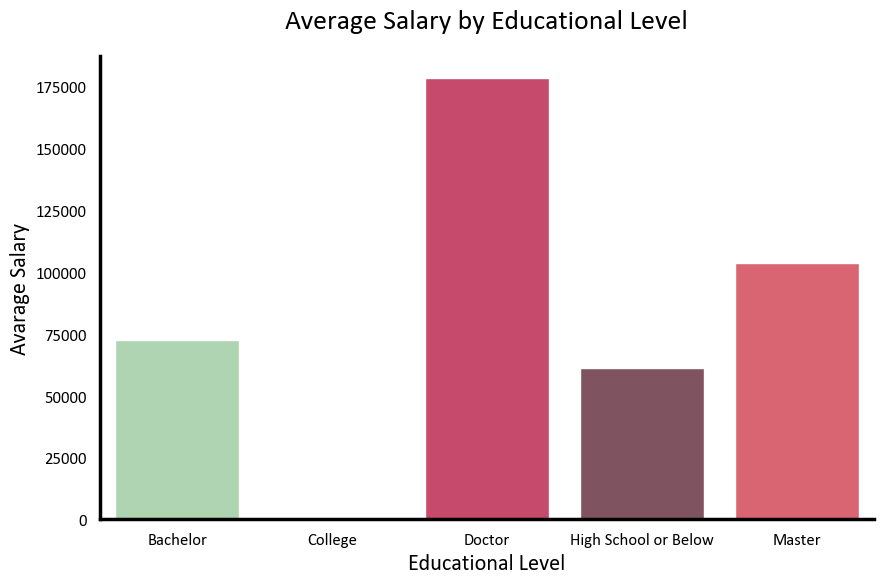

In [53]:
# Primero sacaremos el promedio de los salarios por niveles educativos y lo convertiremos en df para que salga de aquí el gráfico

promedio_salary = df_limpio.groupby("education")["salary"].mean().round(2).reset_index()
promedio_salary.columns = ["Education", "Average Salary"]
promedio_salary

# Usar la paleta inferno de matplotlib para los niveles educativos
colores = ["#A7DBAD", "#CDE640", "#DB3563", "#864D5D", "#ED5263"]

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(9, 6), facecolor="white")
ax.set_facecolor("white")  # Fondo del área de la gráfica a negro

# Crear el gráfico de barras
sns.barplot(
    x="Education",
    y="Average Salary",
    data=promedio_salary,
    ax=ax,
    palette=colores  # Aplicar la paleta de colores
)

# Personalizar etiquetas con color y tamaño de fuente personalizados
ax.set_xlabel("Educational Level", fontsize=16, color="black")
ax.set_ylabel("Avarage Salary", fontsize=16, color="black")

# Cambiar las propiedades de las líneas de los ejes
ax.spines["top"].set_visible(False)     # Ocultar línea superior
ax.spines["right"].set_visible(False)   # Ocultar línea derecha
ax.spines["left"].set_linewidth(2.5)    # Hacer la línea del eje Y más gruesa
ax.spines["bottom"].set_linewidth(2.5)  # Hacer la línea del eje X más gruesa
ax.spines["left"].set_color("black")   # Cambiar el color de la línea del eje Y
ax.spines["bottom"].set_color("black") # Cambiar el color de la línea del eje X

# Cambiar el color de los números de los ejes a amarillo
ax.tick_params(axis="x", colors="black", labelsize=12)  # Ejes X en amarillo
ax.tick_params(axis="y", colors="black", labelsize=12)  # Ejes Y en amarillo

# Título de la gráfica
plt.title("Average Salary by Educational Level", fontsize=20, color="black", pad=20)

# Ajustar la visualización para asegurar que todo se ve adecuadamente
plt.tight_layout()

# Mostrar la gráfica
plt.show()


5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad? 
* Se decanta por el método gráfico pieplot ya que muestra las proporciones de un total y funciona con variables categóricas.
* Lectura: 
    * Se observa que hay una clara tendencia con casi la mitad a la tarjeta star, seguido de la tarjeta nova con un poco más del 30 porciento y por último la tarjeta aurora. Se observa que hay una inclinación clara por la tarjeta star. 
* Aportación:
    * Se sugiere que la empresa revise sus estrarégias pasadas para poder conocer los motivos por parte de los clientes por esta fuerte tendencia. Seguido, se propone que el equipo de marketing, entre otros, revisen cual es el equilibrio optimo de tipos de tarjetas para la empresa y crear una campaña para adecuarlo acorde a lo que desea obtener.

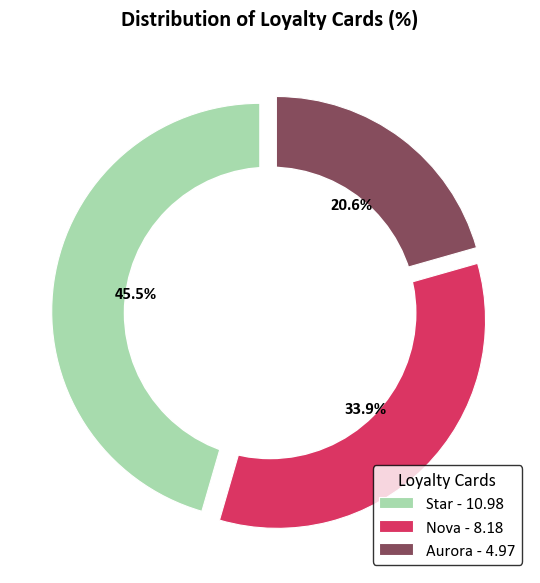

In [64]:
# Primero dividimos entre la cantidad total de clientes las loyalty_card para tener la proporción y lo pasamos a df para sacar de ahí la gráfica.

qty_clientes = df_limpio["loyalty_number"].nunique()
qty_clientes
qty_loyalty_cards = df_limpio["loyalty_card"].value_counts(dropna=True)
qty_loyalty_cards
proporcion = qty_loyalty_cards/qty_clientes
proporcion.round(2)

df_proporcion = pd.DataFrame({"qty_loyalty_card": qty_loyalty_cards, "qty_clientes":qty_clientes, "proporcion":proporcion}).reset_index()
df_proporcion 
# -----------------------------------------------------------------------------------------------------------------------------------------------
# Datos para el gráfico de pastel
labels = df_proporcion["qty_loyalty_card"]
sizes = df_proporcion["proporcion"] * 100  # Convertir a porcentaje
colores = ["#A7DBAD", "#DB3563", "#864D5D"]  # Colores personalizados

# Crear la figura con un tamaño adecuado
fig, ax = plt.subplots(figsize=(9, 6), facecolor="white")

# Crear el gráfico de pastel (anillo)
wedges = ax.pie(
    sizes, 
    labels=None,  # Eliminar etiquetas del gráfico
    autopct=lambda p: f"{p:.1f}%",  # Mostrar porcentajes en el gráfico
    colors=colores, 
    startangle=90, 
    wedgeprops={"edgecolor": "white", "linewidth": 0.8},  # Bordes blancos y más delgados
    explode=[0.05] * len(labels)  # Separar todas las secciones para resaltarlas
)[0]  # Solo necesitamos los wedges para la leyenda

# Añadir un círculo en el centro para dar el efecto de "doughnut"
centre_circle = plt.Circle((0, 0), 0.70, fc="white")
fig.gca().add_artist(centre_circle)

# Añadir un título al gráfico centrado
plt.title("Distribution of Loyalty Cards (%)", color="black", fontsize=16, weight="bold", pad=20, loc="center")

# Añadir una leyenda para explicar las categorías, ubicada abajo a la derecha
ax.legend(
    [f"{card} - {proporcion:.2f}" for card, proporcion in zip(df_proporcion["loyalty_card"], df_proporcion["proporcion"])],
    title="Loyalty Cards",
    loc="lower right",
    fontsize=12,
    title_fontsize="13",
    frameon=True,
    facecolor="white",  # Fondo de la leyenda en negro
    edgecolor="black"   # Borde de la leyenda en blanco
)

plt.setp(ax.get_legend().get_texts(), color="black") 
plt.setp(ax.get_legend().get_title(), color="black")  

for text in ax.texts:
    text.set_color("black")  
    text.set_fontweight("bold")  


plt.tight_layout()

# Mostrar la gráfica
plt.show()


6. ¿Cómo se distribuyen los clientes según su estado civil y género?
* Se decanta por el método gráfico Barplot ya que muestra la comparación entre categorías. También permite la comparación entre variables categóricas.
* Lecutra: 
    * Es proporcional. Rl gráfico nos muestra que no hay diferencias significativas de género para los 3 estados civiles (casado, soltero, divorciado). La proporción de divorciados es casi la mitad de solteros mientras que la de casados es casi el doble que la de solteros. Esto índica que hay una tendencia al matrimonio entre la población de los registros estudiados. 

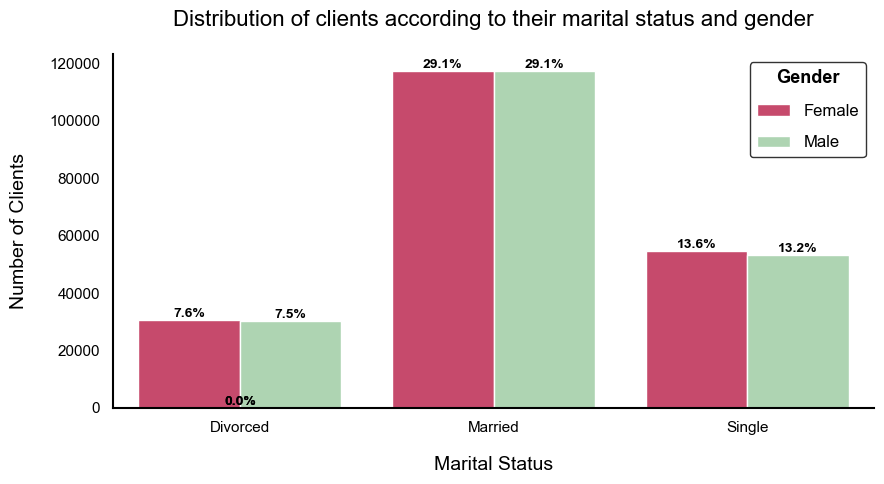

In [59]:
# Primero sacamos la cantidad de clientes por genero y estado civil y así ver la distribución

distribucion = df_limpio.groupby(["marital_status", "gender"]).size().reset_index(name="count")
distribucion
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

colores = ["#DB3563", "#A7DBAD"]  

# Configurar el estilo de Seaborn
sns.set(style="darkgrid")

# Crear la figura y el eje con fondo negro
plt.figure(figsize=(9, 5), facecolor="white")
ax = plt.gca()
ax.set_facecolor("white")

# Crear el gráfico de barras agrupadas
bar_plot = sns.barplot(
    data=distribucion, 
    x="marital_status", 
    y="count", 
    hue="gender", 
    palette=colores
)

# Personalizar el gráfico
plt.title("Distribution of clients according to their marital status and gender", fontsize=16, color="black", pad=20)  # Añadir espacio con pad
plt.xlabel("Marital Status", fontsize=14, color="black", labelpad=15)  # Añadir espacio con labelpad
plt.ylabel("Number of Clients", fontsize=14, color="black", labelpad=15)  # Añadir espacio con labelpad
plt.xticks(rotation=0, color="black")  # Rotar las etiquetas del eje X
plt.yticks(color="black")  # Cambiar el color de las etiquetas del eje Y
plt.legend(title="Gender", title_fontsize="13", fontsize="12", facecolor="white", edgecolor="black", labelspacing=1)
plt.setp(ax.get_legend().get_texts(), color="black")  # Cambiar el color del texto de la leyenda a blanco
plt.setp(ax.get_legend().get_title(), color="black", fontweight="bold")  # Título de la leyenda en bold

# Personalizar las líneas de los ejes
ax.spines["top"].set_visible(False)     # Ocultar línea superior
ax.spines["right"].set_visible(False)   # Ocultar línea derecha
ax.spines["left"].set_color("black")    # Cambiar color de la línea del eje Y
ax.spines["bottom"].set_color("black")   # Cambiar color de la línea del eje X
ax.spines["left"].set_linewidth(1.5)     # Hacer línea del eje Y más gruesa
ax.spines["bottom"].set_linewidth(1.5)   # Hacer línea del eje X más gruesa

# Mostrar los porcentajes en el gráfico
total_counts = distribucion["count"].sum()
for p in bar_plot.patches:
    percentage = f"{(p.get_height() / total_counts) * 100:.1f}%"
    bar_plot.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha="center", va="bottom", fontsize=10, color="black", fontweight="bold")  # Porcentaje en bold

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

### <span style="color:#f3c925">**Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo**</span>
 
Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos a seguir son: 
  
1. Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'. 
2. Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estándar, los percentiles...) del número de vuelos reservados para cada grupo. 
3. Prueba Estadística: Realiza una prueba A/B Testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos. 


1. Preparación de Datos:

In [30]:
df_limpio.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked', 'flights_with_companions', 'total_flights', 'distance', 'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed', 'country', 'province', 'city', 'postal_code', 'gender', 'education', 'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month', 'cancellation_year', 'cancellation_month'], dtype='object')

In [31]:
df_testing = df_limpio[["education", "flights_booked"]]
df_testing

,education,flights_booked
0,Bachelor,3
1,College,10
2,College,6
3,Bachelor,0
4,Bachelor,0
...,...,...
403755,College,0
403756,Doctor,0
403757,Bachelor,3
403758,College,0


2. Análisis Descriptivo: 

In [32]:
df_limpio["education"].isnull().sum() # No tiene núlos
df_limpio["education"].unique() # Tiene 5 valores únicos y es tipo categórica
df_limpio["education"].nunique() 
df_limpio["education"].value_counts()
df_limpio["education"].count() # Tiene 403760 registros
# -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
df_limpio["flights_booked"].isnull().sum() # No tiene núlos
df_limpio["flights_booked"].unique() # Es tipo numérica int64
df_limpio["flights_booked"].nunique() # Tiene 22 valores únicos
df_limpio["flights_booked"].value_counts().sort_values() # La gran mayoría son 0 vuelos
df_limpio["flights_booked"].count() # Tiene 403760 registros

403760

In [33]:
df_testing2 = df_testing.groupby("education")["flights_booked"].agg(flights_booked_COUNT='count',flights_booked_MEAN='mean',flights_booked_MEDIAN='median', 
                                                                    flights_booked_VAR="var",flights_booked_STD="std", flights_booked_RANGE=lambda x: x.max() - x.min(),
                                                                    flights_booked_PERCENTILE_25=lambda x: x.quantile(0.25),
                                                                    flights_booked_PERCENTILE_50=lambda x: x.quantile(0.50),
                                                                    flights_booked_PERCENTILE_75=lambda x: x.quantile(0.75)
).reset_index()


df_testing2

# Count : cuenta cuantas veces se repite por grupo de nivel educativo
    # Vemos rápidamente que la mayoría tienen grado de licenciatura, seguido de un universitario / técnico, así como también se observa que la minoría tiene doctorado
# Mean
    # Vemos que la media es muy similar entre los niveles educativos
# Median
    # Vemos que la mediana es 1 lo cual este caso no nos dice mucho
# Var
    # Vemos que son mucho más altos que la media por lo que nos dice que hay una dispercion enorme de datos, esto indica que tenemos fuertes outliers.
# Std
    # Vemos que la desviación estandar es superior a la media por lo que los datos no son consistentesy vemos de nuevo que tenemos muchos outliers.
# Range
    # El rango es de 21 en general para todos los niveles lo que indica que hay valores outliers.
# Percentiles
    # Vemos que la mayoría están en el percentil 3 que es lo superior a 75%, esto indica que la minoría de los clientes reservan en promedio 8, esto sugiere de nuevo, que hay demasiados valores outliers.

,education,flights_booked_COUNT,flights_booked_MEAN,flights_booked_MEDIAN,flights_booked_VAR,flights_booked_STD,flights_booked_RANGE,flights_booked_PERCENTILE_25,flights_booked_PERCENTILE_50,flights_booked_PERCENTILE_75
0,Bachelor,252567,4.110288,1.0,27.265843,5.221671,21,0.0,1.0,8.0
1,College,102260,4.169744,1.0,27.520938,5.246040,21,0.0,1.0,8.0
2,Doctor,17731,4.175512,1.0,27.635748,5.256971,21,0.0,1.0,8.0
3,High School or Below,18915,4.176209,1.0,27.449915,5.239267,21,0.0,1.0,8.0
4,Master,12287,4.200700,1.0,27.185339,5.213956,21,0.0,1.0,8.0


3. Prueba Estadística: 
* Hipótesis:
    * **H0**: <u>NO hay</u> diferencia significativa en el númro de vuelos reservados entre los diferentes niveles educativos. 
    * **H1**: <u>SI hay</u> una diferencia significativa en el númro de vuelos reservados entre los diferentes niveles educativos. 
#
* Eligiendo el método de prueba:
    * Se decanta por las pruebas no paramétricas al haber testeado la normalidad con un histograma y detectar un fuerte sesgo positivo ya que la enorme mayoría no reservan vuelos.
    * Se descarta la prueba Kruskal-Wallis que si bien es muy apta para este caso, no se puede usar ya que es sólo numérica y es justo en las categorías numéricas que tenemos altos porcentajes de ceros.
    * Se decanta por Mann-Whitney U por descarte, que aunque sólo comparará dos grupos, estos podrán contener tanto numéricos como categóricos. Este método es aplicable y muy válido ya que no hay normalidad y sí muchos outliers en el DataFrame.

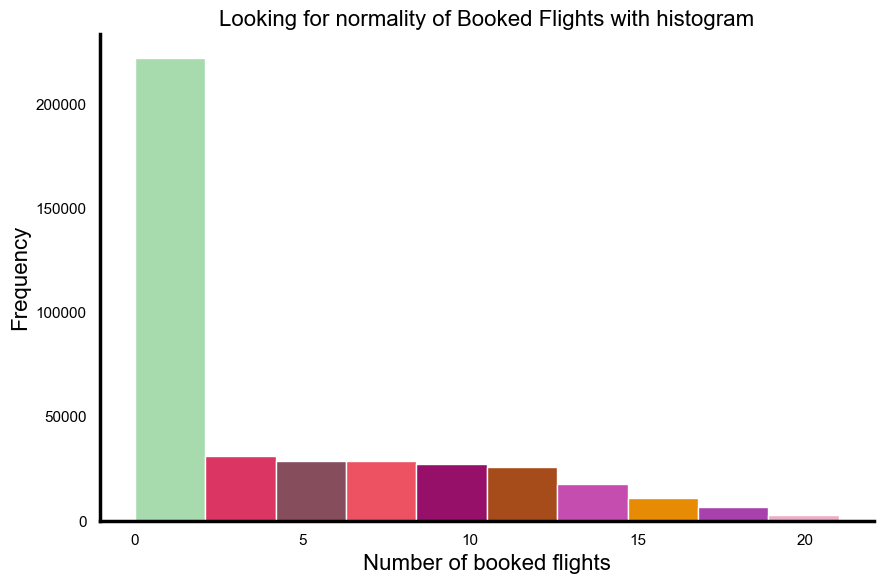

In [60]:
# Antes debemos saber si son métodos normales o no para saber si usamos pruebas paramétricas o no paramétricas.
    # Se observa un fuerte sesgo positivo y vemos que la enorme mayoría no reservan vuelos.
        # Aquí claramente vemos que no hay uan distribución normal

colores = ["#A7DBAD", "#DB3563", "#864D5D", "#ED5263", "#960F68", "#A64B1A", "#C54DB0", "#E68B03","#A941AD", "#EEADC8"]

plt.figure(figsize=(9, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')


n, bins, patches = ax.hist(df_testing['flights_booked'], bins=10, edgecolor='white')  
for i in range(len(patches)):
    patches[i].set_facecolor(colores[i % len(colores)])

ax.set_title('Looking for normality of Booked Flights with histogram', fontsize=16, color='black')
ax.set_xlabel('Number of booked flights', fontsize=16, color='black')  
ax.set_ylabel('Frequency', fontsize=16, color='black')    


ax.spines['top'].set_visible(False)     
ax.spines['right'].set_visible(False)  
ax.spines['left'].set_linewidth(2.5)   
ax.spines['bottom'].set_linewidth(2.5)  
ax.spines['left'].set_color('black')   
ax.spines['bottom'].set_color('black') 

ax.tick_params(axis='x', colors='black') 
ax.tick_params(axis='y', colors='black') 


plt.tight_layout()
plt.show()

* Prueba con prueba de Mann-Whitney U
#
<u>Grupos</u>
* Doctor
* High School or Below

In [35]:
df_limpio["education"].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [36]:
# Esto era para la prueba Kruskal pero que quedó descartada que después se quiso hacer Mann-Whitney y al final no sirve. Borrar
# Creamos los grupos ------------------------------------------------------------------------------------------------------------------------------------------------------------------------

grupo_bachelor = df_limpio [df_limpio ["education"] == "Bachelor"]
grupo_college = df_limpio [df_limpio ["education"] == "College"]
grupo_master = df_limpio [df_limpio ["education"] == "Master"]
grupo_high_school_below = df_limpio [df_limpio ["education"] == "High School or Below"]
grupo_doctor = df_limpio [df_limpio ["education"] == "Doctor"]

# Ahora eliminaremos todos los duplicados de loyalty_number, que si bien se entiende que no son duplicados per se sino ocurrencias del mismo, para esta prueba, deben de ser eliminados------

len(grupo_bachelor) # 252567
grupo_bachelor = grupo_bachelor.drop_duplicates(subset="loyalty_number")
len(grupo_bachelor) # 10475
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
len(grupo_college) # 102260
grupo_college = grupo_college.drop_duplicates(subset="loyalty_number")
len(grupo_college) # 4238
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
len(grupo_master) # 12287
grupo_master = grupo_master.drop_duplicates(subset="loyalty_number")
len(grupo_master) # 508
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# len(grupo_high_school_below) # 18915
grupo_high_school_below = grupo_high_school_below.drop_duplicates(subset="loyalty_number")
len(grupo_high_school_below) # 782
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
len(grupo_doctor) # 17731
grupo_doctor = grupo_doctor.drop_duplicates(subset="loyalty_number")
len(grupo_doctor) # 734"""

# Visto que tenemos varios nulos y columnas con ceros, veamos que grupos de nivel educativo tiene menos para optar por comparar los dos más completos ----------------------------------------
# Revisamos los nulos
grupo_bachelor.isnull().sum()          # 0
grupo_college.isnull().sum()           # salary  4238
grupo_master.isnull().sum()            # 0
grupo_high_school_below.isnull().sum() # 0
grupo_doctor.isnull().sum()            # 0

# Ahora revisamos la cantidad de ceros
def contar_ceros(df):
    total_filas = df.shape[0]
    ceros = (df == 0).sum()
    ceros_presentes = ceros[ceros > 0]
    
    if not ceros_presentes.empty:
        print("Qty de ceros:")
        print(ceros_presentes)
        for columna, count in ceros_presentes.items():
            porcentaje = (count / total_filas) * 100 
            print(f"{columna}: {count} ceros, {porcentaje:.2f}%")
    else:
        print("No hay ceros!!!.")

contar_ceros(grupo_doctor)
# -------------------------------------------------       --------------------------------------------------     ---------------------------------------------------
# grupo_bachelor                                      /   # grupo_college                                     /  # grupo_master
    # flights_booked                  5889   56.22€   /      # flights_booked                 2360   55.69%   /      # flights_booked                 291     57.28%
    # flights_with_companions         8129   77.60%   /      # flights_with_companions        3280   77.39%   /      # flights_with_companions        392     77.17%
    # total_flights                   5889   77.60%   /      # total_flights                  2360   55.69%   /      # total_flights                  291     57.28%
    # distance                        5889   56.22%   /      # distance                       2360   55.69%   /      # distance                       291     57.28%
    # points_accumulated              5889   56.22%   /      # points_accumulated             2360   55.69%   /      # points_accumulated             291     57.28%
    # points_redeemed                10168   97.07%   /      # points_redeemed                4105   96.86%   /      # points_redeemed                488     96.06%
    # dollar_cost_points_redeemed    10168   97.07%   /      # dollar_cost_points_redeemed    4105   96.86%   /      # dollar_cost_points_redeemed    488     96.06%
    # cancellation_year               9189   87.72%   /      # cancellation_year              3711   87.56%   /      # cancellation_year              443     87.20%
    # cancellation_month              9189   87.72%   /      # cancellation_month             3711   87.56%   /      # cancellation_month             443     87.20%
# -------------------------------------------------       --------------------------------------------------     ---------------------------------------------------    
# grupo_high_school_below                             /   # grupo_doctor
    # flights_booked                 441     56.39%          # flights_booked                 421     57.36%
    # flights_with_companions        612     78.26%          # flights_with_companions        572     77.93%
    # total_flights                  441     56.39%          # total_flights                  421     57.36%
    # distance                       441     56.39%          # distance                       421     57.36%
    # points_accumulated             441     56.39%          # points_accumulated             421     57.36%
    # points_redeemed                753     96.29%          # points_redeemed                710     96.73%
    # dollar_cost_points_redeemed    753     96.29%          # dollar_cost_points_redeemed    710     96.73%
    # cancellation_year              689     88.11%          # cancellation_year              638     86.92%
    # cancellation_month             689     88.11%          # cancellation_month             638     86.92%
# -------------------------------------------------       --------------------------------------------------     --------------------------------------------------- 
    

Qty de ceros:
flights_booked                 421
flights_with_companions        572
total_flights                  421
distance                       421
points_accumulated             421
points_redeemed                710
dollar_cost_points_redeemed    710
cancellation_year              638
cancellation_month             638
dtype: int64
flights_booked: 421 ceros, 57.36%
flights_with_companions: 572 ceros, 77.93%
total_flights: 421 ceros, 57.36%
distance: 421 ceros, 57.36%
points_accumulated: 421 ceros, 57.36%
points_redeemed: 710 ceros, 96.73%
dollar_cost_points_redeemed: 710 ceros, 96.73%
cancellation_year: 638 ceros, 86.92%
cancellation_month: 638 ceros, 86.92%


In [37]:
flights_doctor = grupo_doctor['flights_booked']
flights_high_school_below = grupo_high_school_below['flights_booked']

stat, p_value = mannwhitneyu(flights_doctor, flights_high_school_below, alternative='two-sided')

print(f'Estadística U: {stat}')
print(f'Valor p: {p_value}')

# Interpretación de los resultados
alpha = 0.05
if p_value < alpha:
    print("Hipótesis H0 rechazada: hay una diferencia significativa en el número de vuelos reservados entre los grupos.")
else:
    print("Hipótesis H0 no rechazada: no hay una diferencia significativa en el número de vuelos reservados entre los grupos.")



Estadística U: 286789.5
Valor p: 0.9788427749385262
Hipótesis H0 no rechazada: no hay una diferencia significativa en el número de vuelos reservados entre los grupos.


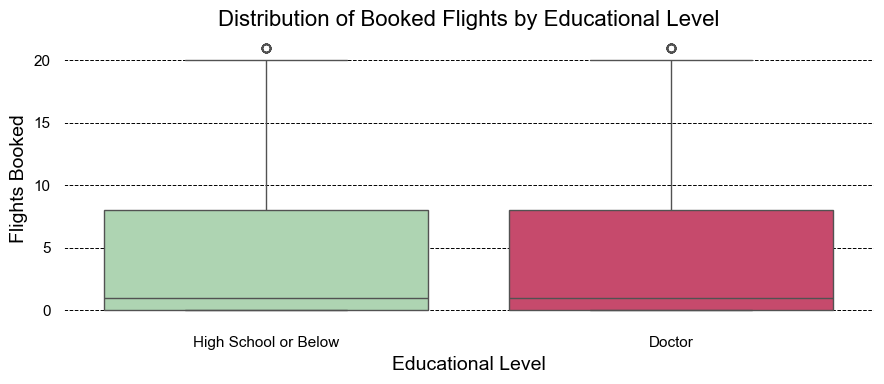

In [62]:
plt.figure(figsize=(9, 4), facecolor="white")

# Crear el boxplot
sns.boxplot(x='education', y='flights_booked', 
            data=df_limpio[df_limpio['education'].isin(['Doctor', 'High School or Below'])], 
            palette=["#A7DBAD", "#DB3563"])

# Personalizando el gráfico 
plt.title('Distribution of Booked Flights by Educational Level', fontsize=16, color='black')
plt.xlabel('Educational Level', fontsize=14, color='black')
plt.ylabel('Flights Booked', fontsize=14, color='black')
plt.xticks(rotation=0, color='black')
plt.yticks(color='black')

# Añadir el grid
plt.grid(axis='y', color='black', linestyle='--', linewidth=0.7)

# Establecer el fondo blanco para el eje
plt.gca().set_facecolor("white")

plt.tight_layout()
plt.show()
